model_name        2149
task_id           2149
candidate_id      2149
metric            2149
error_type        2149
error_msg         2149
code_candidate    2149
test_result        200
stderr            2149
stdout            2149
phase             2149
seed              2149
temperature       2149
top_p             2149
top_k             2149
created_at        2149
eval_method       2149
fold              2149
dtype: int64
Index(['model_name', 'task_id', 'candidate_id', 'metric', 'error_type',
       'error_msg', 'code_candidate', 'test_result', 'stderr', 'stdout',
       'phase', 'seed', 'temperature', 'top_p', 'top_k', 'created_at',
       'eval_method', 'fold', 'syntax_error', 'syntax_parsing_error',
       'syntax_category', 'semantic_error', 'semantic_category',
       'tests_category', 'tests_error'],
      dtype='object')
['syntax' 'semantic' 'tests']
                  category  count  percentage
0  Symbol Resolution Error     85       100.0


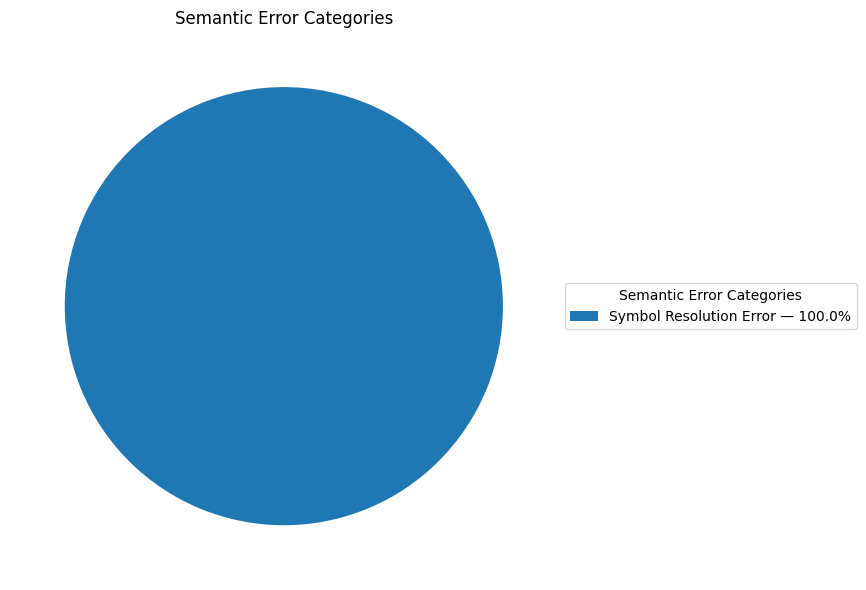

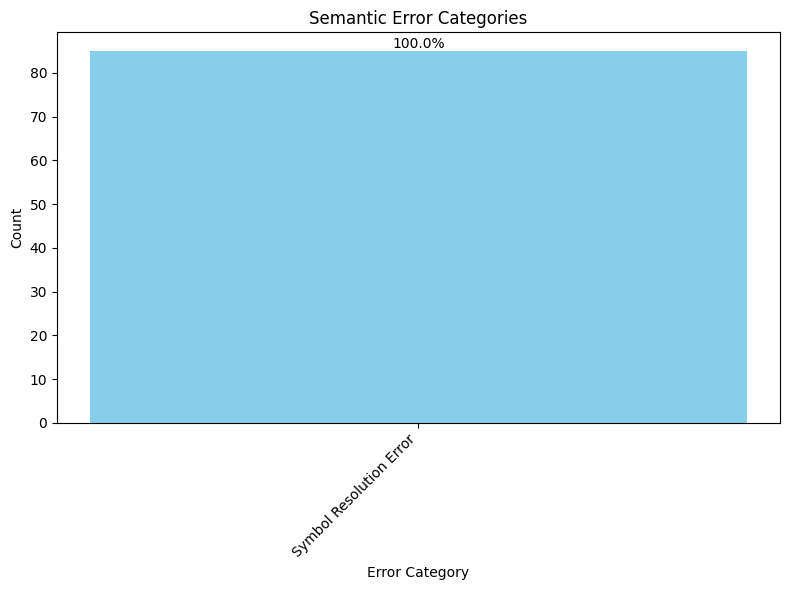

,model_name,task_id,candidate_id,metric,error_type,error_msg,code_candidate,test_result,stderr,stdout,phase,seed,temperature,top_p,top_k,created_at,eval_method,fold,syntax_error,syntax_parsing_error,syntax_category,semantic_error,semantic_category,tests_category,tests_error
109,llama3.2:3b-instruct-fp16,43,4,semantic,semantic,"[ERROR compiler::frontend::semantic_analysis::analyzers::module_analyzer: 212: Error analyzing arrow: Failed to resolve symbol: sub_852f2e.second, ERROR compiler::frontend::semantic_analysis::analyzers::module_analyzer: 213: backtrace: disabled backtrace, ERROR compiler::frontend::semantic_analysis::analyzers::module_analyzer: 214: arrow errors are currently ignore since arrow targets might change based on user actions, in which case we just want to get rid of those arrows, until we find a more robust scheme, ERROR compiler::frontend::semantic_analysis::analyzers::module_analyzer: 212: Error analyzing arrow: Failed to resolve symbol: number_3bc2ae, ERROR compiler::frontend::semantic_analysis::analyzers::module_analyzer: 213: backtrace: disabled backtrace, ERROR compiler::frontend::semantic_analysis::analyzers::module_analyzer: 214: arrow errors are currently ignore since arrow targets might change based on user actions, in which case we just want to get rid of those arrows, until we find a more robust scheme]","import(""std"", Std_k98ojb)\nimport(""http"", Http_q7o96c)\n\nmodule() main { \n func(doc: ""Finds the first odd number in a given list of numbers."") first_odd {\n in(x: -284, y: -0, name: ""list"") property(List) list_abed4a\n out(x: 593, y: -1, name: ""number"") property(Number) number_3bc2ae\n\n instance(x: 88, y: 54) filter_f3b46d root.Std_k98ojb.Query.Filter {\n where: ""it % 2 != 0""\n }\n list_abed4a -> filter_f3b46d.list\n filter_f3b46d.result -> number_3bc2ae\n }\n\n \n\n instance(x: -34, y: 127) firstitem_870503 root.Std_k98ojb.List.FirstItem {}\n instance(x: -48, y: 517) sub_852f2e root.Std_k98ojb.Math.Sub {}\n instance(x: 188, y: 425) expression_8eee0e root.Std_k98ojb.Math.Expression {\n expression: ""j""\n }\n firstitem_870503.item -> sub_852f2e.first\n sub_852f2e.second -> expression_8eee0e.gen_0\n expression_8eee0e.result -> number_3bc2ae\n}",None,,"Installing dependencies for midio_example@0.1.0\n\nNo external dependencies\n\nBuilding package...\n[31mERROR[0m [2mcompiler::frontend::semantic_analysis::analyzers::module_analyzer[0m[2m:[0m [2m212:[0m Error analyzing arrow: Failed to resolve symbol: sub_852f2e.second\n[31mERROR[0m [2mcompiler::frontend::semantic_analysis::analyzers::module_analyzer[0m[2m:[0m [2m213:[0m backtrace: disabled backtrace\n[31mERROR[0m [2mcompiler::frontend::semantic_analysis::analyzers::module_analyzer[0m[2m:[0m [2m214:[0m arrow errors are currently ignore since arrow targets might change based on user actions, in which case we just want to get rid of those arrows, until we find a more robust scheme\n[31mERROR[0m [2mcompiler::frontend::semantic_analysis::analyzers::module_analyzer[0m[2m:[0m [2m212:[0m Error analyzing arrow: Failed to resolve symbol: number_3bc2ae\n[31mERROR[0m [2mcompiler::frontend::semantic_analysis::analyzers::module_analyzer[0m[2m:[0m [2m213:[0m backtrace: disabled backtrace\n[31mERROR[0m [2mcompiler::frontend::semantic_analysis::analyzers::module_analyzer[0m[2m:[0m [2m214:[0m arrow errors are currently ignore since arrow targets might change based on user actions, in which case we just want to get rid of those arrows, until we find a more robust scheme\nPackage built successfully!",testing,12,0.2,0.9,10,2025-04-07 21:23:23.771,3_fold,0,,[],Other syntax error,"[Failed to resolve symbol: sub_852f2e.second, Failed to resolve symbol: number_3bc2ae]",{Symbol Resolution Error},0/3,"0/3 tests passed.\n Test results:\nNo test results found.\nERROR compiler::frontend::semantic_analysis::analyzers::module_analyzer: 212: Error analyzing arrow: Failed to resolve symbol: sub_852f2e.second\nERROR compil

In [11]:
import re
import os
import subprocess
import sys
from matplotlib import pyplot as plt
import pandas as pd


sys.path.append('../../')  # Add the path to the my_packages module
os.environ['EXPERIMENT_DB_NAME'] = "few_shot_experiments"
from my_packages.analysis.error_analysis import categorize_semantic_errors, categorize_syntax_error, categorize_syntax_parsing_error, categorize_test_errors, extract_semantic_errors, extract_test_error, get_error_category_counts, make_categories_bar_chart, make_categories_pie_chart
from my_packages.db_service.error_service import delete_error_docs, errors_to_df, pretty_print_errors
from my_packages.evaluation.midio_compiler import compile_code, is_code_syntax_valid
from my_packages.db_service.experiment_service import experiment_exists, pretty_print_experiment_collections, run_experiment_quality_checks, setup_experiment_collection

experiment_name = f"signature_similarity_5_shot"
error_type = "semantic"
filter = {
    "eval_method": "3_fold",
    "model_name": "llama3.2:3b-instruct-fp16",
    "phase": "testing",
}
# Categorize and extract errors:
df = errors_to_df(experiment_name, filter=filter)
print(df.count())
df["syntax_error"] = df["stderr"]
df["syntax_parsing_error"] = df["stderr"].apply(categorize_syntax_parsing_error)
df["syntax_category"] = df["stderr"].apply(categorize_syntax_error)

df["semantic_error"] = df["error_msg"].apply(extract_semantic_errors)
df["semantic_category"] = df["error_msg"].apply(categorize_semantic_errors)

df["tests_category"] = df["test_result"].apply(categorize_test_errors)
df["tests_error"] = df.apply(
    lambda row: extract_test_error(row["tests_category"], row["error_msg"], row["test_result"]),
    axis=1
)

filtered_df = df[
    (df["error_type"] == error_type) &
    (df[f"{error_type}_category"] == {'Symbol Resolution Error'})
    # & (df[f"syntax_parsing_error"] == '[Parsing failed]') 

]
print(filtered_df.columns)


# Show all rows
pd.set_option('display.max_rows', None)     

# Show all columns
pd.set_option('display.max_columns', None)

# Show full content in each cell
pd.set_option('display.max_colwidth', None)

print(df["error_type"].unique())


errors_count_df = get_error_category_counts(filtered_df, f"{error_type}_category")
print(errors_count_df)

make_categories_pie_chart(errors_count_df, title=f"{error_type.capitalize()} Error Categories")
make_categories_bar_chart(errors_count_df, title=f"{error_type.capitalize()} Error Categories")


filtered_df.head(50)



In [ ]:
import re
import os
import subprocess
import sys
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../../')  # Add the path to the my_packages module
os.environ['EXPERIMENT_DB_NAME'] = "few_shot_experiments"

from my_packages.analysis.error_analysis import (
    categorize_semantic_errors, 
    categorize_syntax_error, 
    categorize_syntax_parsing_error,
    categorize_test_errors, 
    extract_semantic_errors, 
    extract_test_error, 
    get_error_category_counts, 
    make_categories_bar_chart, 
    make_categories_pie_chart
)
from my_packages.db_service.error_service import delete_error_docs, errors_to_df, pretty_print_errors
from my_packages.evaluation.midio_compiler import compile_code, is_code_syntax_valid
from my_packages.db_service.experiment_service import experiment_exists, pretty_print_experiment_collections, run_experiment_quality_checks, setup_experiment_collection

def categorize_erors(experiment_name: str,
                     metric: str,
                     filter: dict = {
                         "eval_method": "3_fold",
                         "model_name": "llama3.2:3b-instruct-fp16",
                         "phase": "testing",
                     },
                     ):
    # Categorize and extract errors
    df = errors_to_df(experiment_name, filter=filter)
    if metric == "syntax":
        df["syntax_error"] = df["stderr"]
        df["syntax_parsing_error"] = df["stderr"].apply(categorize_syntax_parsing_error)
        df["syntax_category"] = df["stderr"].apply(categorize_syntax_error)
    elif metric == "semantic":
        df["semantic_error"] = df["error_msg"].apply(extract_semantic_errors)
        df["semantic_category"] = df["error_msg"].apply(categorize_semantic_errors)
    elif metric == "tests":
        df["tests_category"] = df["test_result"].apply(categorize_test_errors)
        df["tests_error"] = df.apply(
            lambda row: extract_test_error(row["tests_category"], row["error_msg"], row["test_result"]),
            axis=1
        )
    return df

def get_all_errors_comparison(metric, parsing_errors = True):
    rows = []
    for model in ["llama3.2:3b-instruct-fp16", "llama3.3:70b-instruct-fp16", "phi4:14b-fp16"]:
        for prompt in ["regular", "signature"]:
            for shots in [5]:
                df = categorize_erors(
                    experiment_name=f"{prompt}_similarity_{shots}_shot",
                    metric=metric,
                    filter={"eval_method": "3_fold", "model_name": model, "phase": "testing"},
                )
                filtered_df = df[df["error_type"] == metric]
                if parsing_errors:
                    filtered_df = filtered_df[filtered_df["syntax_category"] == "Parsing failed"]
                    errors_count_df = get_error_category_counts(filtered_df, f"{metric}_parsing_error")
                else:
                    errors_count_df = get_error_category_counts(filtered_df, f"{metric}_category")
            
                # Loop over each error category row and append as individual rows
                # make_categories_pie_chart(errors_count_df, title=f"{error_type.capitalize()} Error Categories")
                # make_categories_bar_chart(errors_count_df, title=f"{error_type.capitalize()} Error Categories")
                for _, row in errors_count_df.iterrows():
                    rows.append({
                        "model": model,
                        "prompt": prompt,
                        "shots": shots,
                        "category": row["category"],
                        "count": row["count"],
                        "percentage": row["percentage"],
                    })
    return pd.DataFrame(rows)

comparison_df = get_all_errors_comparison("syntax")

fig, axs = plt.subplots(2, 3, figsize=(9, 4.2))  # Slightly shorter height
models = ["llama3.2:3b-instruct-fp16", "phi4:14b-fp16", "llama3.3:70b-instruct-fp16"]
prompts = ["regular", "signature"]

for row_idx, prompt in enumerate(prompts):
    for col_idx, model in enumerate(models):
        ax = axs[row_idx, col_idx]
        df = comparison_df[
            (comparison_df["prompt"] == prompt) & (comparison_df["model"] == model)
        ]

        df = df.sort_values(by="percentage", ascending=False).head(5)
        df = df.sort_values(by="percentage", ascending=True)

        bars = ax.barh(df["category"], df["percentage"], color="#aed6f1", edgecolor="gray")

        for bar in bars:
            width = bar.get_width()
            ax.text(width + 0.6, bar.get_y() + bar.get_height() / 2,
                    f"{width:.1f}", va="center", fontsize=5)

        # Enhance title
        model_label = model.upper()
        ax.set_title(model_label, fontsize=7, fontweight='bold')
        ax.set_xlim(0, 50)
        ax.set_xlabel("Percentage", fontsize=6)
        ax.set_ylabel(f"({prompt.capitalize()} prompt)\n Unexpected Tokens", fontsize=6) if col_idx == 0 else ax.set_ylabel("")
        ax.tick_params(axis='both', labelsize=5)
        ax.spines[['top', 'right']].set_visible(False)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.60)
# plt.tight_layout(pad=0.1)
plt.savefig("top5_unexpected_tokens_all_models_compact.png", dpi=300)
plt.show()


ValueError: Collection 'regular_similarity_5_shot_errors' is empty in MongoDB.